## Dimensionality Reduction + K-Means

In [1]:
import pandas as pd
import numpy as np

### Read datasets

In [2]:
df_help_center = pd.read_parquet("FT_SEARCH_TERMS.parquet")
df_help_center.shape

(85410, 4)

In [3]:
df_ipc = pd.read_parquet("IPC_SEARCH_QUERY_TERMS.parquet")
df_ipc.shape

(16127, 8)

In [4]:
df_google = pd.read_parquet("PERFORMANCE_REPORT_CUSTOM.parquet")
df_google.shape

(1430248, 3)

### 1- Talend Help Center : User queries + embedding

In [5]:
thc_embedd = pd.read_parquet('./queries_unique_embeddings/talend_HC_unique_queries_embedding.parquet')
thc_embedd

,QUERY_TERMS,embedding
0,management console,"[-0.004322341693185566, -0.030163845395668177,..."
1,talend cloud data catalog administration guide,"[-0.012687883335647096, -0.0081912912401424, -..."
2,authentication protocols,"[-0.005785695361989555, -0.0050168676106133, 0..."
3,data catalog,"[-0.01183576152363635, -0.011971230765135885, ..."
4,logging in to the studio,"[-0.006270805165635671, -0.025466070624882403,..."
...,...,...
38487,tmap type length precision,"[-0.009533870630991807, 0.01000067370341025, 0..."
38488,create a job that illustrates the process of e...,"[-0.03291688505120821, -0.01156285132150887, -..."
38489,data base connecton,"[-0.027216859308402265, 0.0012151657203450083,..."
38490,selecting and configuring the database,"[0.001809233214592607, 0.004131455433434716, 0..."


In [6]:
df_help_center['LANGUAGE'].value_counts()

en-US    77574
fr-FR     4506
ja-JP     2555
de-DE      389
zh-CN      386
Name: LANGUAGE, dtype: int64

##### Only for English queries :

In [7]:
df = df_help_center[df_help_center['LANGUAGE']=='en-US']
df2 = pd.DataFrame(df["QUERY_TERMS"].unique(), columns=['QUERY_TERMS'])
df2

,QUERY_TERMS
0,management console
1,talend cloud data catalog administration guide
2,authentication protocols
3,data catalog
4,logging in to the studio
...,...
35439,tmap type length precision
35440,create a job that illustrates the process of e...
35441,data base connecton
35442,selecting and configuring the database


In [8]:
thc_en = pd.merge(thc_embedd, df2, on='QUERY_TERMS', how='inner')
thc_en

,QUERY_TERMS,embedding
0,management console,"[-0.004322341693185566, -0.030163845395668177,..."
1,talend cloud data catalog administration guide,"[-0.012687883335647096, -0.0081912912401424, -..."
2,authentication protocols,"[-0.005785695361989555, -0.0050168676106133, 0..."
3,data catalog,"[-0.01183576152363635, -0.011971230765135885, ..."
4,logging in to the studio,"[-0.006270805165635671, -0.025466070624882403,..."
...,...,...
35439,tmap type length precision,"[-0.009533870630991807, 0.01000067370341025, 0..."
35440,create a job that illustrates the process of e...,"[-0.03291688505120821, -0.01156285132150887, -..."
35441,data base connecton,"[-0.027216859308402265, 0.0012151657203450083,..."
35442,selecting and configuring the database,"[0.001809233214592607, 0.004131455433434716, 0..."


### 2- Google : User queries + embedding

In [9]:
google_embedd = pd.read_parquet('./queries_unique_embeddings/google_queries_unique_embeddings.parquet')
google_embedd

,QUERY,embedding
0,talend sap,"[-0.011422375105710116, -0.0332235988715449, 0..."
1,sap talend,"[-0.006255174100263367, -0.02995636335497445, ..."
2,tflowtoiterate talend,"[-0.04371899229381361, -0.026086970706513456, ..."
3,talend tftpfilelist,"[-0.020819874876695583, -0.02204194323452131, ..."
4,talend java version,"[0.0006890799722034253, -0.036536014890475504,..."
...,...,...
11469,remove duplicates in ssis,"[-0.005339802104102244, 0.005379091811963196, ..."
11470,telecharger talend open studio for data integr...,"[-0.010846117369653428, -0.044624830944309524,..."
11471,excel afficher date du jour,"[-0.03160782917011587, -0.004686912076193646, ..."
11472,java home windows,"[-0.008222157815992939, -0.022413921789728477,..."


### 3-IPC: User queries + embedding

In [10]:
ipc_embedd = pd.read_parquet('./queries_unique_embeddings/ipc_queries_unique_embeddings.parquet')
ipc_embedd

,INPUT_VALUES_SEARCH_QUERY,embedding
1,delete account,"[-0.03002667820875631, -0.015312518101690856, ..."
2,convert bulk to ReST,"[-0.006475940047170754, 0.013213157973951499, ..."
3,fetch license file,"[-0.0019105491550711702, 0.001966318614425126,..."
4,cannot find task version from database,"[-0.02670016570154868, -0.008580103104015208, ..."
5,character encoding,"[-0.011962658253795, 0.0005135878070066096, 0...."
...,...,...
7339,how to convert talend studio into talend cloud,"[-0.010953764802413989, -0.022288785140119494,..."
7340,IP Whitelist,"[-0.006736527387763341, -0.019494728320854058,..."
7341,full,"[-0.004613058159430843, -0.011234858964527344,..."
7342,how to conect talend studio whit talend cloud,"[-0.02093189858074042, -0.02974008631428586, 0..."


## Dimensionality reduction + Clustering:

1- PCA (80% variance)

2- K-MEANS ( K=5)

#### 1 - Talend help center

In [13]:
matrix_thc = np.vstack(thc_en.embedding.values)
type(matrix_thc)

numpy.ndarray

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca_matrix = PCA()
pca_matrix.fit(matrix_thc)
explained_variance = pca_matrix.explained_variance_ratio_

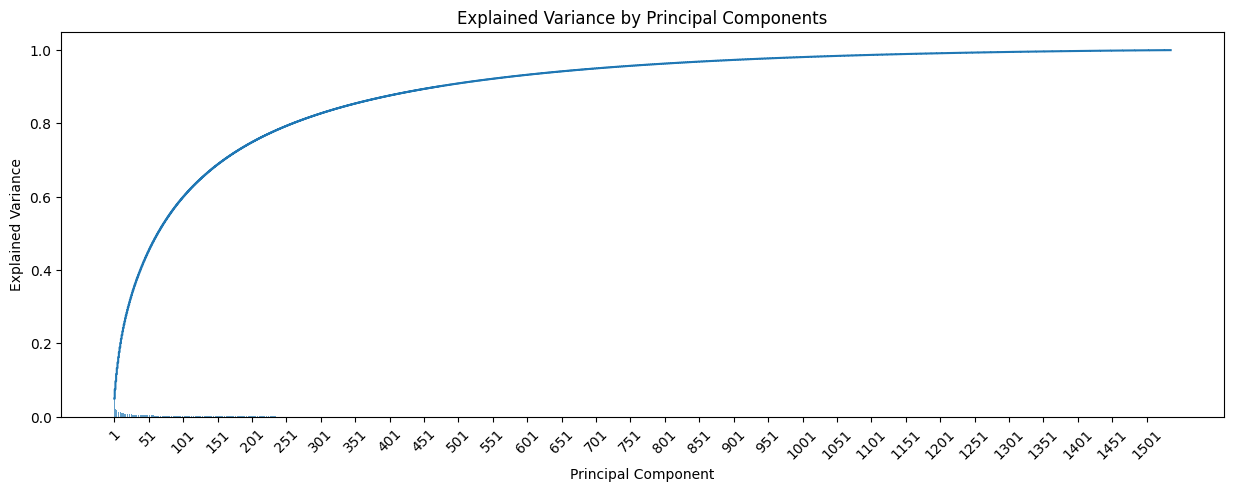

In [22]:
plt.figure(figsize=(15, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1, 50), rotation=45)
plt.show()

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.80, random_state=42)
thc_matrix_reduced= pca.fit_transform(matrix_thc)
thc_matrix_reduced.shape

(35444, 260)

In [30]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(thc_matrix_reduced)
labels = kmeans.labels_
thc_en["Cluster"] = labels


C:\Users\ehilmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [31]:
for i in range(n_clusters):
    df = thc_en[thc_en["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["QUERY_TERMS"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
secure connection configuration
-dforceupdate
"dproject.distributionmanagement.repository.url"
dlicense.path
spark yarn dynamic allocation
"sap-api-8.2.4"
kafka bokers service name
mapexecutioncontext
setting a jvm argument
debugging jobs


################## Cluster 1 ##################
import job
"streaming dq components"
livy log
kibanna
signum
studio 8.0
analyzing the quality of a field
collaborator
delete report mart
"cumulative patch"


################## Cluster 2 ##################
composant t unit
how to connect ftp server using tsystem component
define storage period in tac
tfilesinputxml
tsalesforceoutput standard properties
tintervalmarch
tmc allow
tcmp*
tsambaput
cdc tigger


################## Cluster 3 ##################
mongodb dynamic
compatible database data prep
java row1
mdm auto_increment
writing the data into redshift
ibm cognos
exporting a data mapping
data acqusition message broker
what are xml and json files
sort 

scatter plot of the first two components:

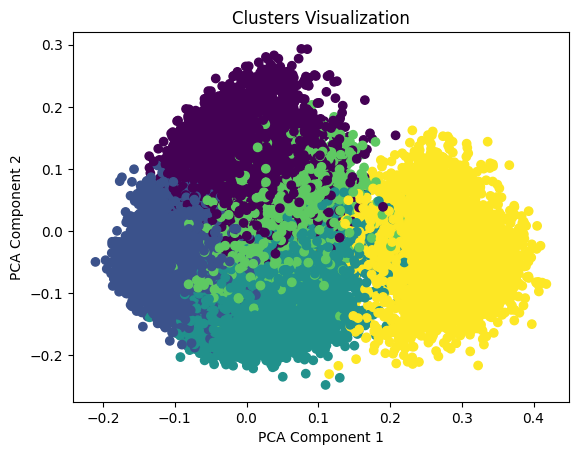

In [44]:
import matplotlib.pyplot as plt
plt.scatter(thc_matrix_reduced[:, 0], thc_matrix_reduced[:, 1], c=thc_en["Cluster"], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization')
plt.show()

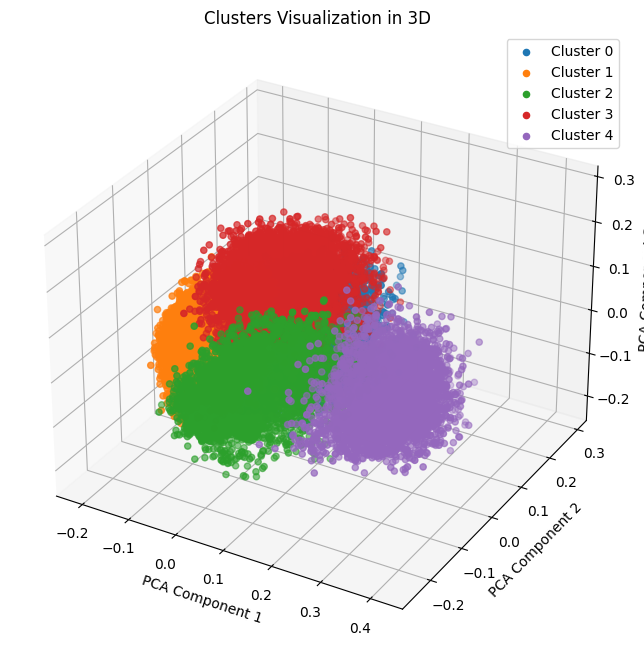

In [45]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with colors based on their cluster labels
for i in range(n_clusters):
    cluster_points = thc_matrix_reduced[thc_en["Cluster"] == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Clusters Visualization in 3D')
ax.legend()

plt.show()


#### 2- Google search

In [26]:
matrix_gg = np.vstack(google_embedd.embedding.values)
matrix_gg.shape

(11474, 1536)

In [24]:
pca_matrix = PCA()
pca_matrix.fit(matrix_gg)
explained_variance = pca_matrix.explained_variance_ratio_

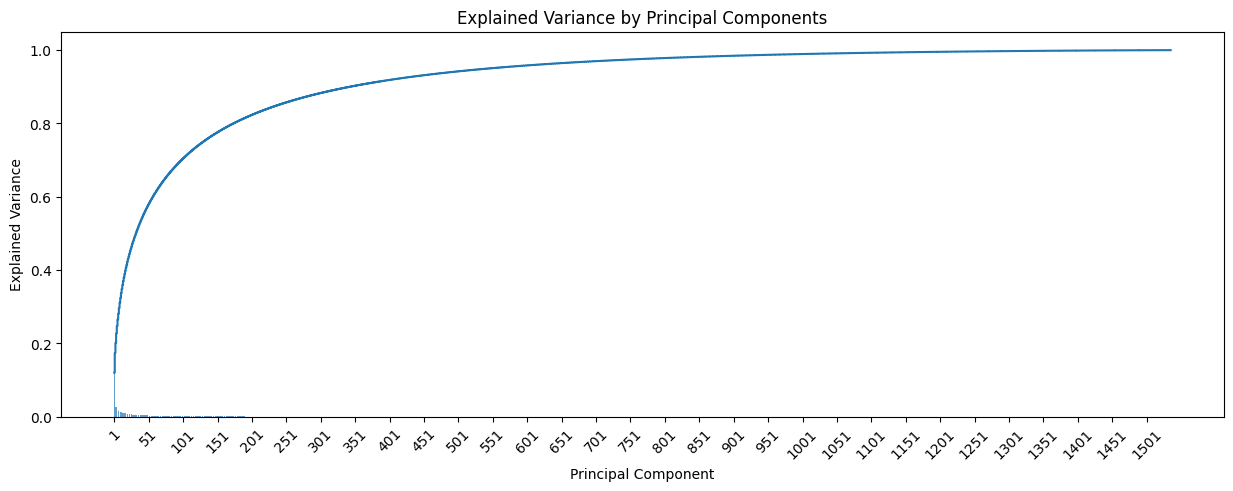

In [25]:
plt.figure(figsize=(15, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1, 50), rotation=45)
plt.show()

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.80, random_state=42)
matrix_reduced_gg= pca.fit_transform(matrix_gg)
matrix_reduced_gg.shape

(11474, 174)

In [38]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix_reduced_gg)
labels = kmeans.labels_
google_embedd["Cluster"] = labels


C:\Users\ehilmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
for i in range(n_clusters):
    df = google_embedd[google_embedd["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["QUERY"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
talend odbc
talend tmap if else expression
talend sample jobs
talend catch output reject
talend windows authentication
talend loop through rows
talend open studio教學
talend api tester vs postman
talend studio open source
talend on premise


################## Cluster 1 ##################
open studio download
discrete data is based on count continuous data can occupy any value in a given range
h2 database online console
tac admin
which component triggers the tlogcatcher component for exhaustive log before killing the job
get credentials.json google
scd type 0
tos_di
azure devops run pipeline
tfileinputmsxml


################## Cluster 2 ##################
group by talend
date format in talend
help talend
indexof talend
tlogcatcher talend example
tnormalize example in talend
textractregexfields talend
string to float talend
jvm compatibility talend
types of schemas in talend


################## Cluster 3 ##################
hh date
yyy-mm-d

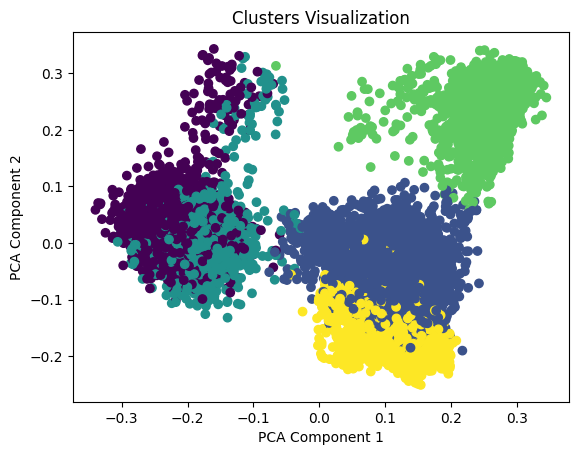

In [40]:
import matplotlib.pyplot as plt
plt.scatter(matrix_reduced_gg[:, 0], matrix_reduced_gg[:, 1], c=google_embedd["Cluster"] , cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization')
plt.show()

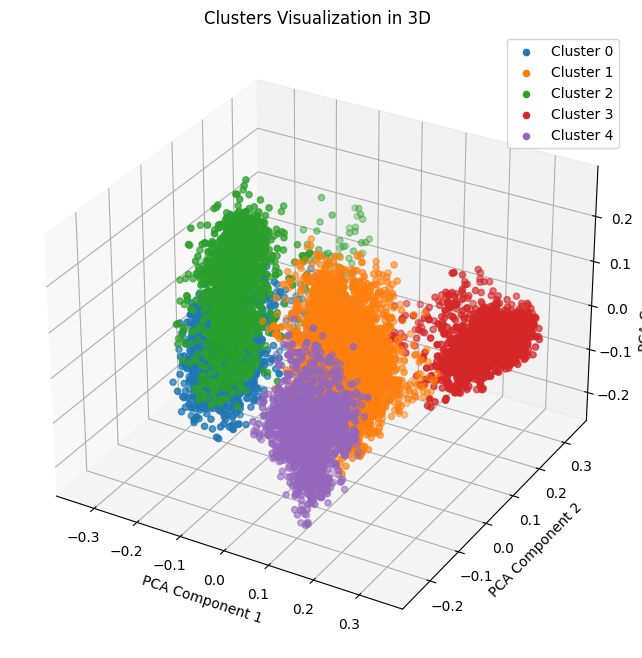

In [43]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with colors based on their cluster labels
for i in range(n_clusters):
    cluster_points = matrix_reduced_gg[google_embedd["Cluster"]  == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Clusters Visualization in 3D')
ax.legend()

plt.show()


#### 3- IPC

In [27]:
matrix_ipc = np.vstack(ipc_embedd.embedding.values)
type(matrix_ipc)

numpy.ndarray

In [28]:
pca_matrix = PCA()
pca_matrix.fit(matrix_ipc)
explained_variance = pca_matrix.explained_variance_ratio_

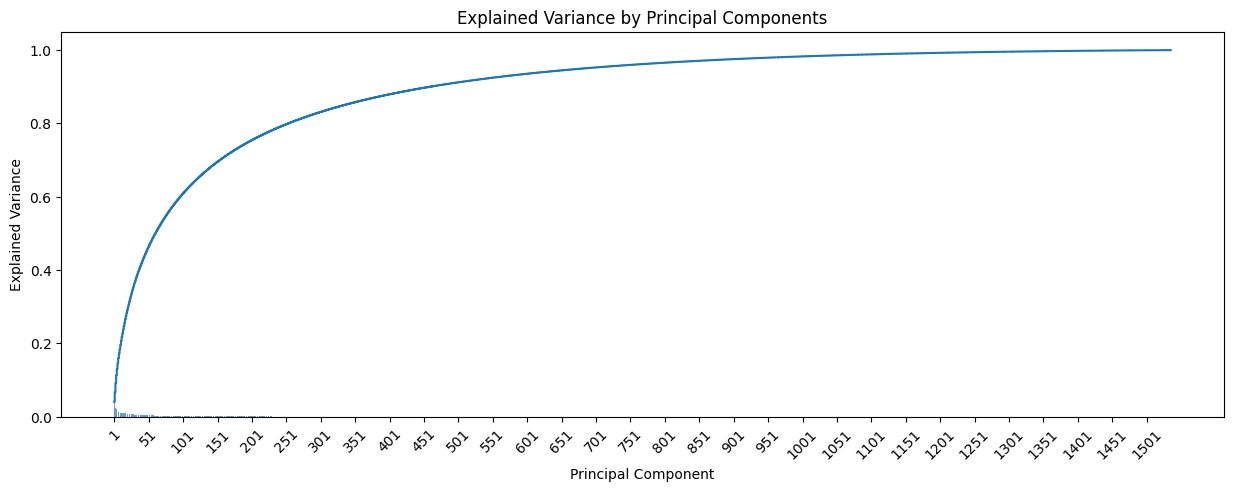

In [29]:
plt.figure(figsize=(15, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), where='mid')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.xticks(range(1, len(explained_variance) + 1, 50), rotation=45)
plt.show()

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
matrix_reduced_ipc= pca.fit_transform(matrix_ipc)
matrix_reduced_ipc.shape

(7343, 683)

In [49]:
from sklearn.cluster import KMeans

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, init="k-means++", random_state=42)
kmeans.fit(matrix_reduced_ipc)
labels = kmeans.labels_
ipc_embedd["Cluster"] = labels


C:\Users\ehilmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [50]:
for i in range(n_clusters):
    df = ipc_embedd[ipc_embedd["Cluster"]==i]
    print(f"################## Cluster {i} ##################")
    examples = df["INPUT_VALUES_SEARCH_QUERY"].sample(10).tolist()
    for example in examples:
        print(example)
    print("\n")

################## Cluster 0 ##################
Hi does Talend Open Studio has cloud version?
talend academy
How to re-pair Talend remote engine
Hi Talend team, I am unable retrieve the project in Talend Studio which is created in TMC. Is there any issue?
Hi, we have actually some Technical issues and closed all firewalls. Now we want to open the door for talend tmc and our remote engines. Can you say us, which ip or domain we should choose?
Hi, I woulf like to know if Talend Data Mapper is available in studio for my subscription?
exporting from Talend management console
Dear Talend Support Team.
issue when opening talend open studio
talend studio 8.0.1


################## Cluster 1 ##################
2FA
salesforce integration
sending alerts to distribution emails
build a test suite
resource url
studio license download
get scedule time
Change Bill to
region endpoints
netsuite web services


################## Cluster 2 ##################
cursor
Access
installer
PREFERENCES
AWS
Creati

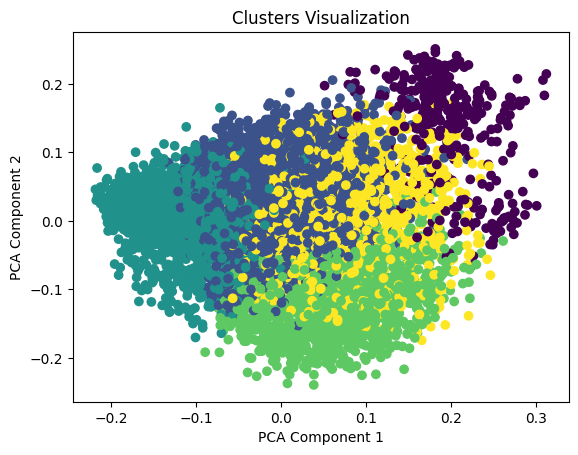

In [51]:
import matplotlib.pyplot as plt
plt.scatter(matrix_reduced_ipc[:, 0], matrix_reduced_ipc[:, 1], c=ipc_embedd["Cluster"] , cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization')
plt.show()

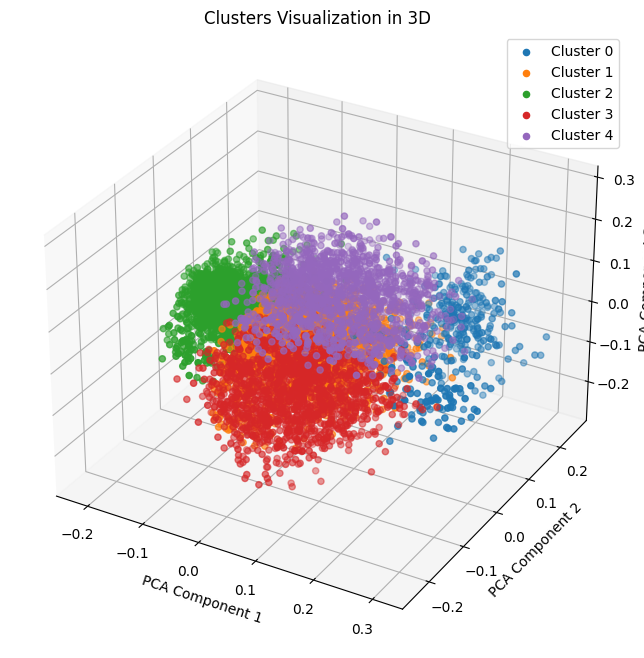

In [52]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with colors based on their cluster labels
for i in range(n_clusters):
    cluster_points = matrix_reduced_ipc[ipc_embedd["Cluster"]  == i]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {i}')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('Clusters Visualization in 3D')
ax.legend()

plt.show()
